
**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update your Course 1 notebook with links to your own work once completed!

# Mini-project 5.3 Detecting the anomalous activity of a ship’s engine



This mini-project allows you to explore detecting the anomalous activity of a ship’s engine.

A poorly maintained ship engine in the supply chain industry can lead to inefficiencies, increased fuel consumption, higher risks of malfunctions, and potential safety hazards. 


<br></br>

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

The task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform anomaly detection.

You must prepare a report illustrating your insights to the prospective stakeholders, showing how your solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question you need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

<br></br>

> **Disclaimer**
>
> Please note that although a real-life data set was provided, the business context in this project is fictitious. Any resemblance to companies and persons (living or dead) is coincidental. 

<br></br>



1. **Import the required libraries and data set with the provided URL.**

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

2. **View the DataFrame and perform EDA, including identifying missing or duplicate values.**

In [2]:
# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'
data = pd.read_csv(url)
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [3]:
# Determine metadata of DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


3. **Generate the descriptive statistics of the data, including observing the mean for each feature
identifying the median
idenitfying the range values beyond the 95th percentile for at least two features.**

In [10]:
# Summary statistics
print("Summary Statistics:")
print(data.describe(), "\n")

# Mean for each feature
print("Mean Values:\n")
print(data.mean(numeric_only=True), "\n")

# Median for each feature
print("Median Values:\n")
print(data.median(numeric_only=True), "\n")

# Range (max - min) for each feature
print("Range for Each Feature:\n")
range_vals = data.max(numeric_only=True) - data.min(numeric_only=True)
print(range_vals, "\n")

# Observing values beyond 95th percentile for two features
for feature in ["Engine rpm", "Lub oil pressure"]:
    threshold = data[feature].quantile(0.95)
    outliers = data[data[feature] > threshold]
    print(f"Values beyond 95th percentile for '{feature}' (threshold = {threshold:.2f}):")
    print(outliers[[feature]])
    print()

# Check for missing values
print("Missing Values:")
print(data.isnull().sum(), "\n")

# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Summary Statistics:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  
count  19535.000000  19535.000000  
mean      77.643420     78.427433  
std        3.110984      6.206749  
min       71.321974     61.673325  
25%       75.725990     73.895421  
50%       76.817350     78.346662  
75%       78.071691     82.915411  
max       89.580796    19

4. **Visualise the data to determine the distribution and extreme values.**

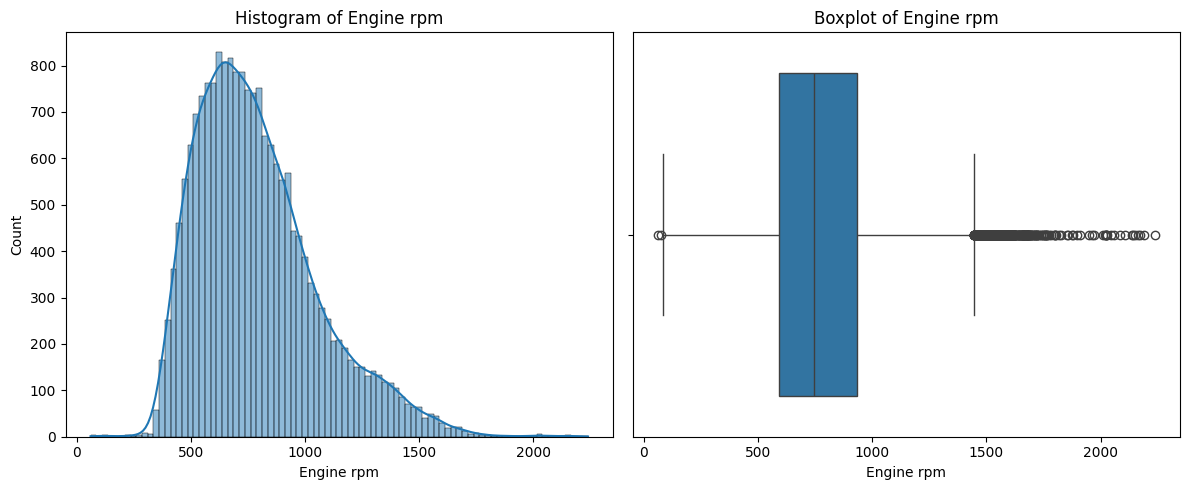

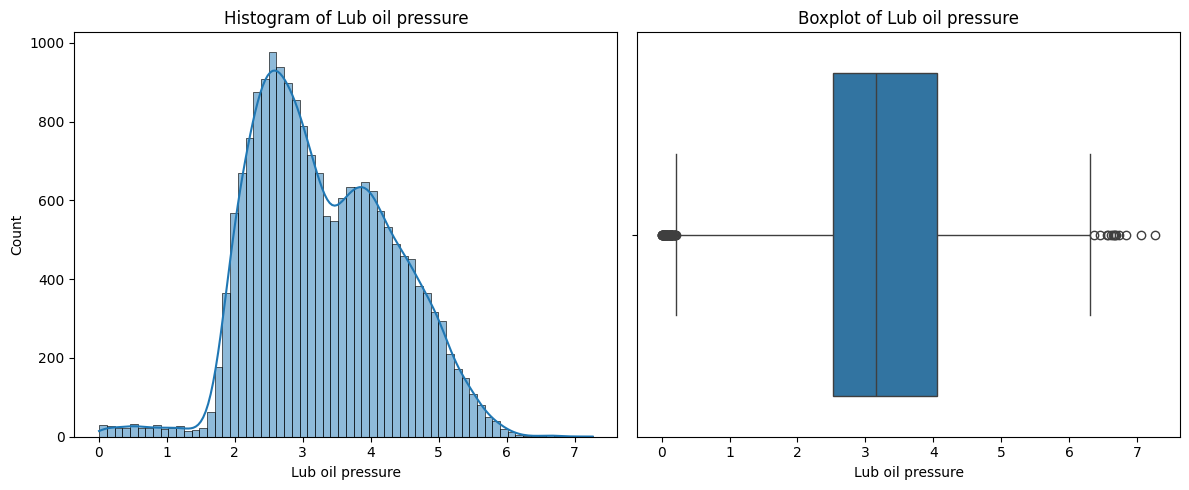

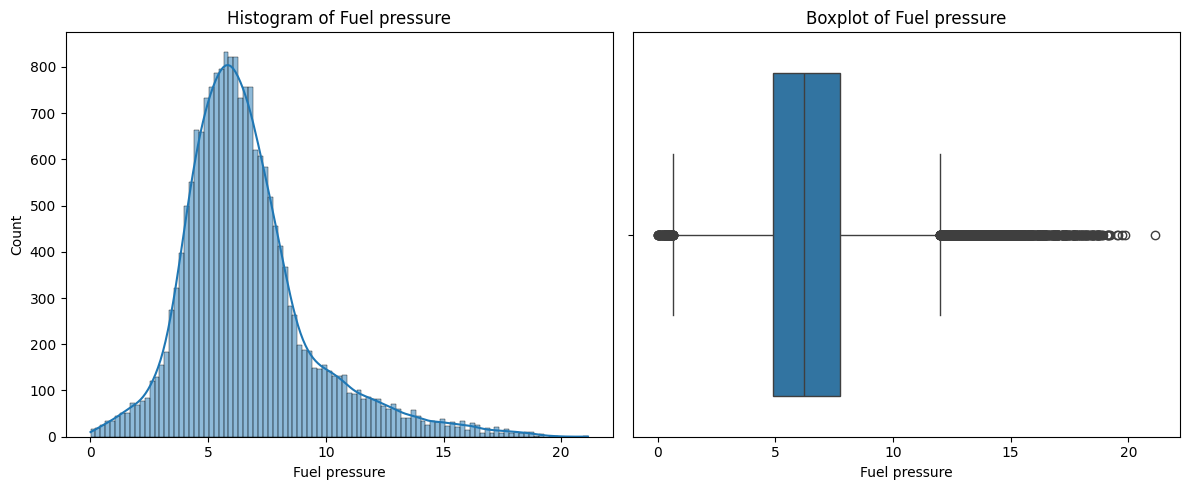

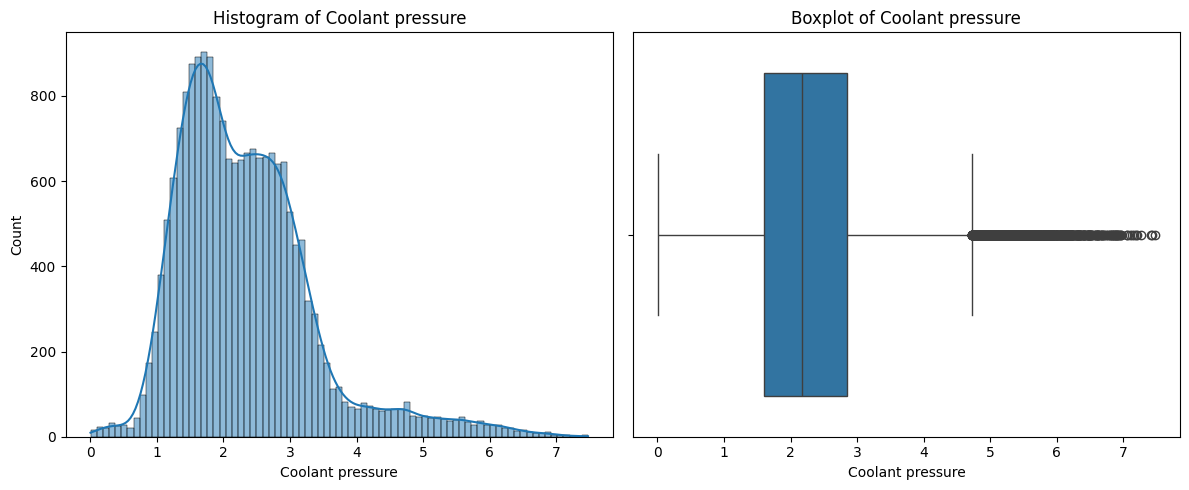

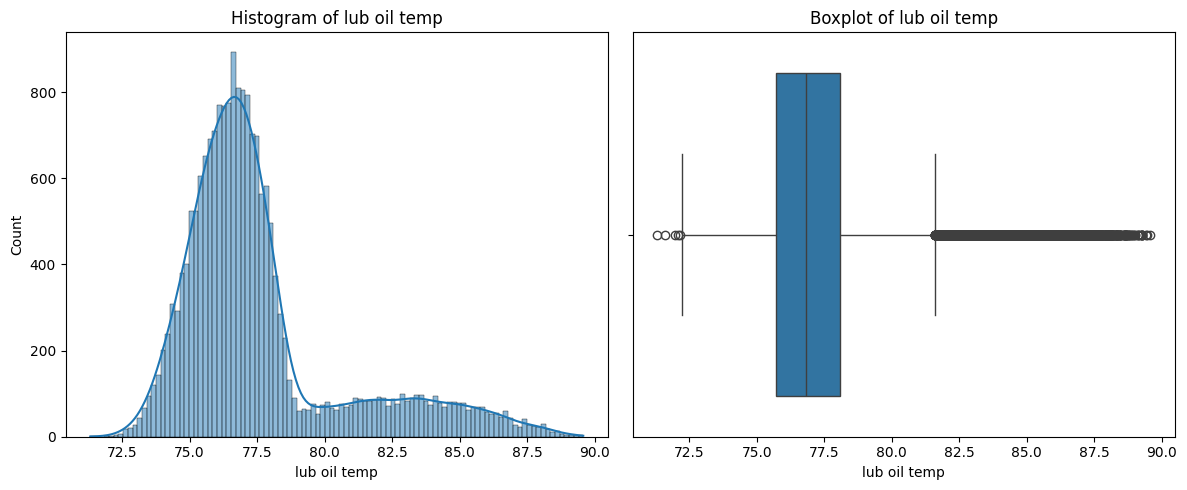

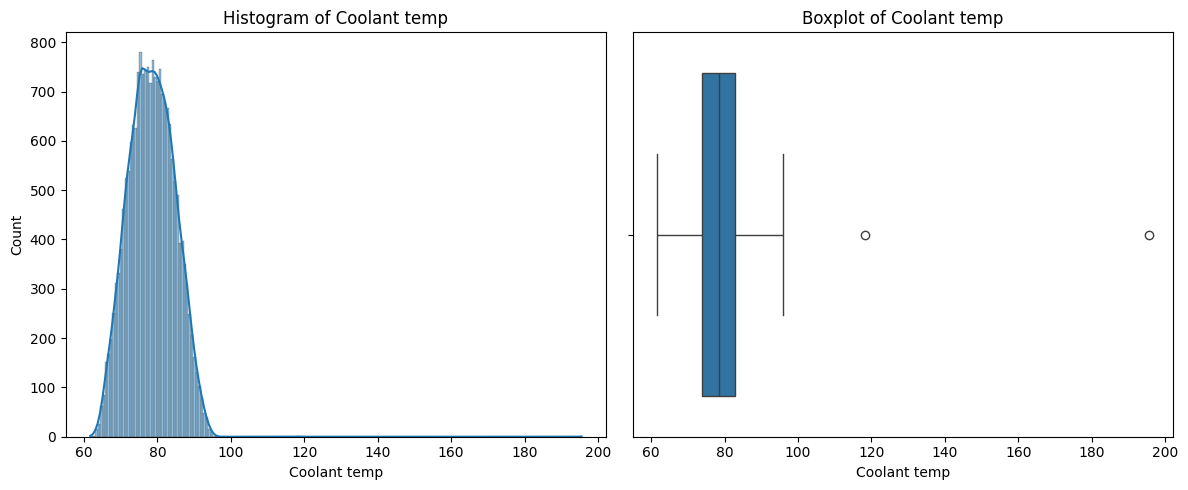

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    "Engine rpm",
    "Lub oil pressure",
    "Fuel pressure",
    "Coolant pressure",
    "lub oil temp",
    "Coolant temp"
]

for column in columns_to_plot:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()


5. **Perform anomaly detection with a statistical method and identify possible anomalies**

In [13]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Create a DataFrame to store binary outlier flags
outlier_flags = pd.DataFrame(index=numeric_data.index)

# Detect outliers using IQR for each feature
for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a binary column indicating outliers
    outlier_flags[f"{col}_outlier"] = ((numeric_data[col] < lower_bound) |
                                       (numeric_data[col] > upper_bound)).astype(int)

# Add the binary flags to the original data
data_with_flags = pd.concat([data, outlier_flags], axis=1)

# Count how many features are outliers for each row
data_with_flags['outlier_count'] = outlier_flags.sum(axis=1)

# Flag a sample as an overall anomaly if it has 2 or more outlier features
data_with_flags['is_anomaly'] = (data_with_flags['outlier_count'] >= 2).astype(int)

# Display detected anomalies
anomalies = data_with_flags[data_with_flags['is_anomaly'] == 1]
print("Samples flagged as anomalies (2 or more IQR outliers):\n")
print(anomalies)

# View outlier flags per feature
outlier_summary = outlier_flags.sum().sort_values(ascending=False)
print("\nNumber of outliers per feature:")
print(outlier_summary)

# Show summary
# Total number of samples
total_samples = data_with_flags.shape[0]

# Total number of anomalies
total_anomalies = anomalies.shape[0]

# Calculate percentage
anomaly_percentage = (total_anomalies / total_samples) * 100

# Display
print(f"\nTotal number of anomalies detected: {total_anomalies} out of {total_samples} samples")
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


Samples flagged as anomalies (2 or more IQR outliers):

       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
113          1495          3.276230       3.714396          2.495264   
122          1454          2.063374       6.168260          1.260121   
131           830          3.231908      13.479172          2.568096   
144          1762          1.697487       4.327845          2.523372   
148          1494          2.443220       3.548139          1.953403   
...           ...               ...            ...               ...   
19236         771          1.816642      12.071438          2.303487   
19306         944          4.198864       5.088806          4.759353   
19328         771          3.916701       5.136610          5.592643   
19343        1475          2.184002       6.558549          1.265442   
19433         986          2.929212      14.431486          4.985264   

       lub oil temp  Coolant temp  Engine rpm_outlier  \
113       85.053243   

Record your thoughts and oberservations:

*   IQR Outlier Detection - is a robust method that not affected by skewed data or extreme values.
*   Applying >=2 features rule for outliers we reduce the possibility to include some extreme values. Also it helps us provide the intuition that real issue with engine happened only when several parameters has some issues. And this will means that we cut off mulfunctioned sensors, extreme engine behavior and faulty data entries.
*   Features like "Engine rp"m or "Lub oil pressure" often show more outliers due to their high variability or thresholds set by machine design.



6. **Perform anomaly detection with ML models**

6.1 Perform feature scaling to prepare the data for ML algorithms.

In [14]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features (excluding any previously added outlier flags or binary columns)
numeric_data = data.select_dtypes(include='number')

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_data = scaler.fit_transform(numeric_data)

# Convert back to DataFrame with original column names
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Confirm the result
print("Scaled Data (first 5 rows):\n")
print(scaled_df.head())

Scaled Data (first 5 rows):

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.408212         -0.892819      -0.738304          0.495596   
1   -0.695950          2.117332      -0.083759          3.273154   
2   -0.497896          0.127697      -1.077426         -0.633625   
3   -0.157842         -1.183534       0.168533         -0.671293   
4   -0.430633          0.229492      -0.253226          0.858747   

   lub oil temp  Coolant temp  
0     -0.440709     -1.376412  
1     -1.421047     -0.567158  
2      3.358026      0.044690  
3      0.005852      0.637913  
4     -0.776966     -1.816491  


6.2 Using one-class SVM


Running One-Class SVM with nu=0.01, gamma=scale
Outlier percentage: 1.01%


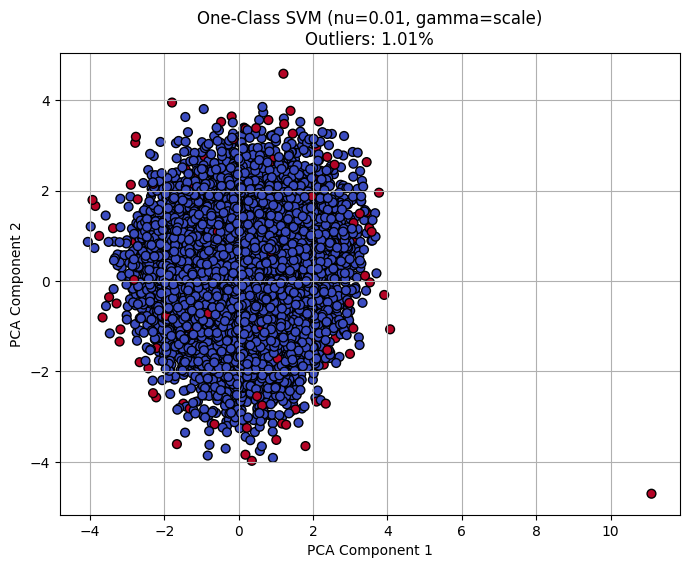


Running One-Class SVM with nu=0.03, gamma=scale
Outlier percentage: 2.99%


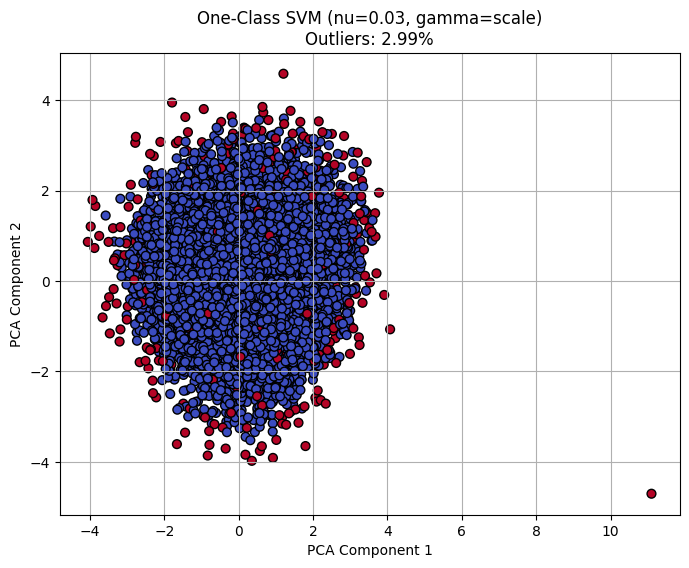


Running One-Class SVM with nu=0.05, gamma=scale
Outlier percentage: 5.00%


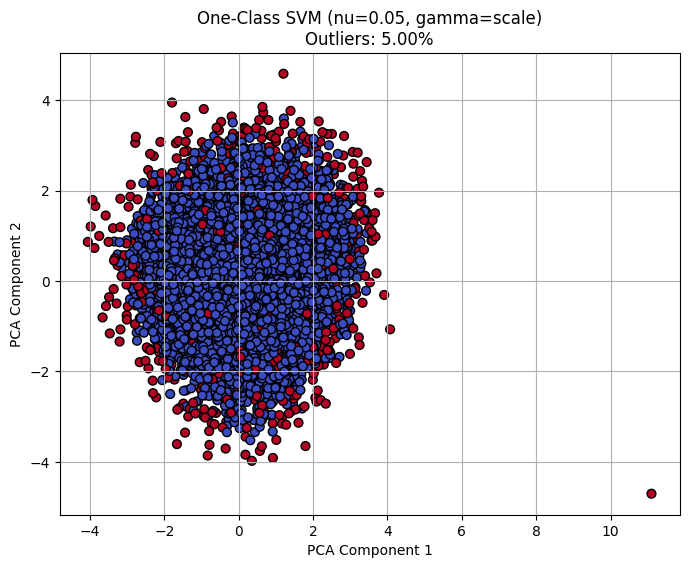

In [15]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

def run_ocsvm_and_plot(nu_val, gamma_val):
    print(f"\nRunning One-Class SVM with nu={nu_val}, gamma={gamma_val}")

    # Fit One-Class SVM
    oc_svm = OneClassSVM(kernel="rbf", nu=nu_val, gamma=gamma_val)
    y_pred = oc_svm.fit_predict(scaled_data)  # +1 for inliers, -1 for outliers

    # Map labels: 1 for inliers, 0 for outliers
    anomaly_labels = (y_pred == -1).astype(int)
    outlier_ratio = np.mean(anomaly_labels) * 100
    print(f"Outlier percentage: {outlier_ratio:.2f}%")

    # Visualize using PCA-reduced data
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=anomaly_labels, cmap='coolwarm', edgecolor='k', s=40)
    plt.title(f"One-Class SVM (nu={nu_val}, gamma={gamma_val})\nOutliers: {outlier_ratio:.2f}%")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

# Try different nu values (controls expected outlier %)
for nu_val in [0.01, 0.03, 0.05]:
    run_ocsvm_and_plot(nu_val=nu_val, gamma_val='scale')

Record your insights about the use of this method:

*   One-Class SVM performs reasonably well when scaled data is used and hyperparameters are carefully tuned.
*   PCA helps visualize separation but doesn't influence model quality. Useful to visually validate if detected outliers are distinct.
*   One-Class SVM works best for finding unusual data points when most of the data is normal and there are only a few outliers.


6.3 Using Isolation Forest


Running Isolation Forest with contamination=0.01
Outlier percentage: 1.00%


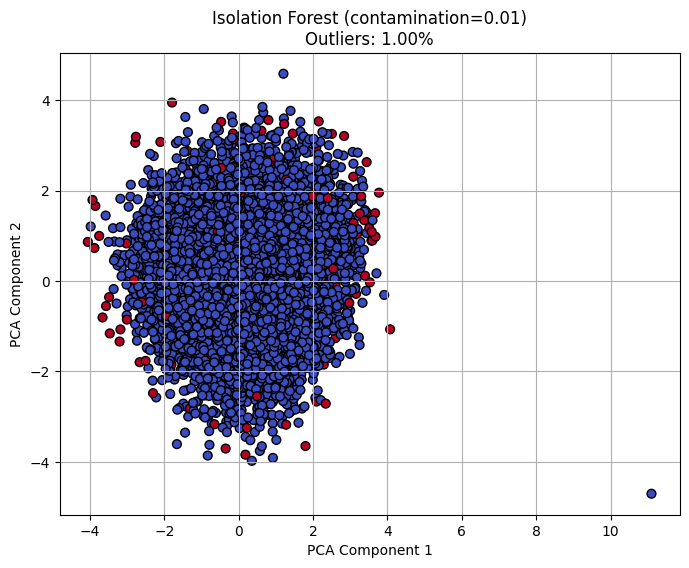


Running Isolation Forest with contamination=0.03
Outlier percentage: 3.00%


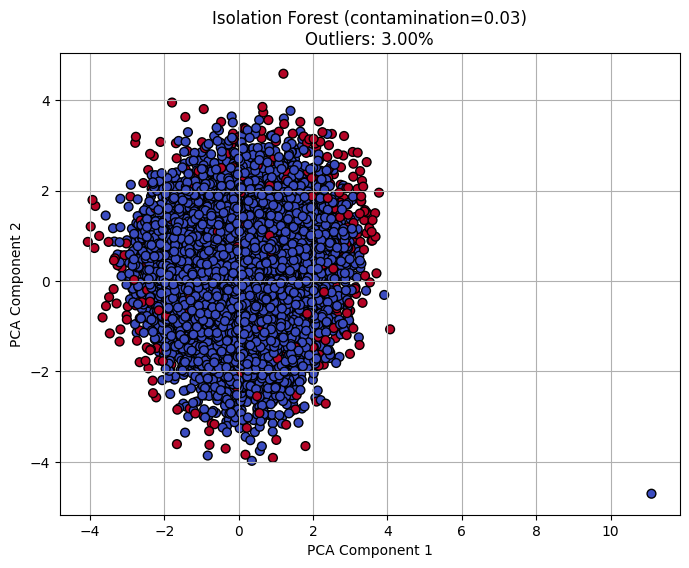


Running Isolation Forest with contamination=0.05
Outlier percentage: 5.00%


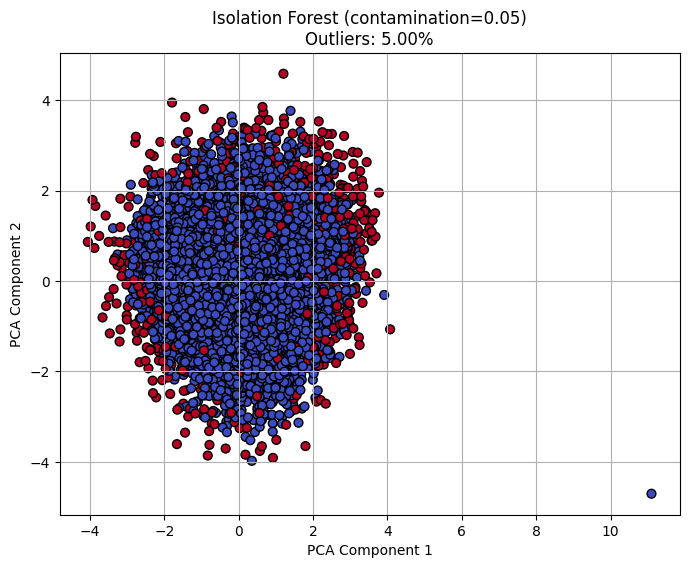

In [16]:
# PCA for 2D visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

from sklearn.ensemble import IsolationForest

def run_isolation_forest_and_plot(contamination_val):
    print(f"\nRunning Isolation Forest with contamination={contamination_val}")

    # Fit the model
    iso_forest = IsolationForest(contamination=contamination_val, random_state=42)
    y_pred = iso_forest.fit_predict(scaled_data)  # -1 for outliers, 1 for inliers

    # Map to binary 1 = outlier, 0 = inlier
    anomaly_labels = (y_pred == -1).astype(int)
    outlier_ratio = np.mean(anomaly_labels) * 100
    print(f"Outlier percentage: {outlier_ratio:.2f}%")

    # Visualize in 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=anomaly_labels, cmap='coolwarm', edgecolor='k', s=40)
    plt.title(f"Isolation Forest (contamination={contamination_val})\nOutliers: {outlier_ratio:.2f}%")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

# Try different contamination values to simulate 1–5% anomaly rates
for contamination in [0.01, 0.03, 0.05]:
    run_isolation_forest_and_plot(contamination)

Record your insights about the use of this method:

*   Isolation Forest finds outliers by randomly splitting the data. Unusual points get separated more quickly, so they stand out with shorter paths.
*   Compared to One-Class SVM, Isolation Forest is easier to adjust, runs faster, and handles uneven or grouped data better.


# Reflect

To identify anomalies in the engine sensor dataset, I applied both statistical and machine learning approaches. I began with Interquartile Range (IQR) analysis to detect outliers based on feature distributions, ensuring a solid statistical baseline. I then used One-Class SVM and Isolation Forest for unsupervised anomaly detection, scaling the data and reducing it with PCA for visualization. I experimented with different hyperparameter settings (e.g., nu, contamination) to align detected outliers with expected real-world rates (1–5%). By comparing methods, I evaluated their sensitivity, speed, and reliability across different data characteristics. This multi-step process helps to effectively surface potential faults or abnormal patterns in the data.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]